In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

In [49]:
df = pd.read_csv(r'E:\AI\Grad Project\Student Score Prediction\StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [51]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [52]:
df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

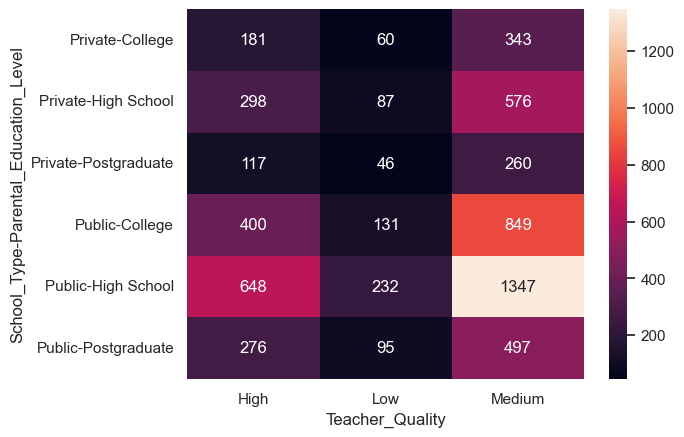

In [53]:
heat_map_teacher = df.groupby(['School_Type','Parental_Education_Level'])['Teacher_Quality'].value_counts().unstack()
sns.heatmap(heat_map_teacher , annot=True , fmt='d')
plt.show()

In [54]:
# fill teacher_quality by median bec it's have most frequancy 
df['Teacher_Quality'].fillna('Medium',inplace = True)

C:\Users\kero melad\AppData\Local\Temp\ipykernel_8028\1416494805.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna('Medium',inplace = True)


In [55]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality                0
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

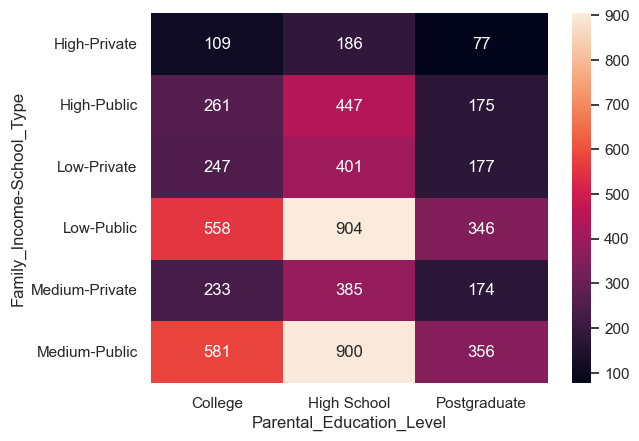

In [56]:
heat_map_parental = df.groupby(['Family_Income','School_Type'])['Parental_Education_Level'].value_counts().unstack()
sns.heatmap(heat_map_parental,annot=True,fmt='d')
plt.show()

In [57]:
df['Parental_Education_Level'].fillna('High School',inplace= True)

C:\Users\kero melad\AppData\Local\Temp\ipykernel_8028\857799605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parental_Education_Level'].fillna('High School',inplace= True)


In [60]:
df.groupby('Physical_Activity')['Distance_from_Home'].value_counts().unstack()

Distance_from_Home,Far,Moderate,Near
Physical_Activity,,,
0,3,15,27
1,43,122,248
2,184,507,917
3,238,740,1544
4,147,491,925
5,41,111,205
6,2,12,18


In [59]:
df.loc[df['Distance_from_Home'].isna()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
359,15,64,Medium,Medium,Yes,6,76,High,Yes,2,Medium,Medium,Private,Positive,4,Yes,High School,NaN,Female,63
380,15,70,High,Medium,No,9,57,Medium,Yes,1,Medium,Medium,Private,Negative,3,No,High School,NaN,Female,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,11,72,High,Low,No,8,55,High,Yes,0,Medium,Low,Public,Neutral,3,Yes,College,NaN,Male,60
6494,14,77,Medium,Medium,Yes,4,81,Low,Yes,3,Medium,Medium,Private,Neutral,3,No,College,NaN,Female,66
6496,26,77,Low,Medium,Yes,7,71,High,Yes,3,High,Medium,Public,Neutral,3,No,High School,NaN,Female,69
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70


In [13]:
df['Distance_from_Home'] = np.where(df['Distance_from_Home'].isna(),
    np.where(df['Physical_Activity'] >= 3, 'Near', 'Moderate'),
    df['Distance_from_Home']
)

In [14]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


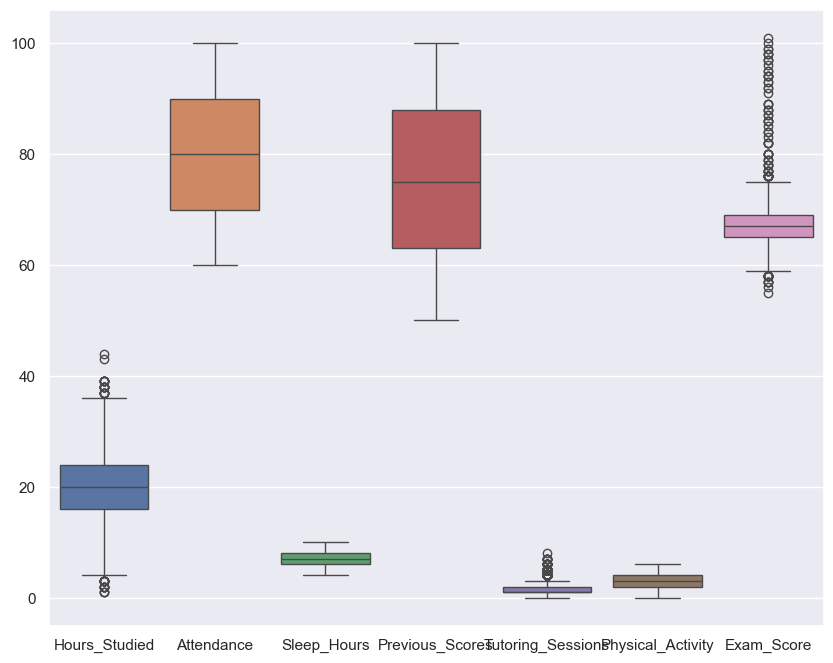

In [15]:
# no outliers that's normal exapct exam score over than 100 i replace it by 100 
plt.figure(figsize=(10,8))
sns.boxplot(df)
plt.show()

In [16]:
df.loc[df['Exam_Score'] > 100,'Exam_Score'] = 100

# Start encoding the data 

In [17]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [18]:
print(df['Parental_Involvement'].value_counts())
print(df['Access_to_Resources'].value_counts())
print(df['Extracurricular_Activities'].value_counts())
print(df['Motivation_Level'].value_counts())
print(df['Internet_Access'].value_counts())
print(df['Family_Income'].value_counts())
print(df['Teacher_Quality'].value_counts())
print(df['School_Type'].value_counts())
print(df['Peer_Influence'].value_counts())
print(df['Learning_Disabilities'].value_counts())
print(df['Distance_from_Home'].value_counts())
print(df['Gender'].value_counts())
print(df['Parental_Education_Level'].value_counts())

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
Distance_from_Home
Near        3923
Moderate    2026
Far          658
Name: count, dtype: int64
Gender
Male      3814
Female    2793
Name: count, dtype: int64
Parental_Education_Le

In [29]:
df.replace({'Parental_Involvement':{'High':0,'Medium':1,'Low':2}},inplace=True)
df.replace({'Access_to_Resources':{'High':0,'Medium':1,'Low':2}},inplace=True)
df.replace({'Motivation_Level':{'High':0,'Medium':1,'Low':2}},inplace=True)
df.replace({'Family_Income':{'High':0,'Medium':1,'Low':2}},inplace=True)
df.replace({'Teacher_Quality':{'High':0,'Medium':1,'Low':2}},inplace=True)
df.replace({'Extracurricular_Activities':{'Yes':1,'No':0}},inplace=True)
df.replace({'Learning_Disabilities':{'Yes':1,'No':0}},inplace=True)
df.replace({'Internet_Access':{'Yes':1,'No':0}},inplace=True)
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
df.replace({'Peer_Influence':{'Neutral':0,'Positive':1,'Negative':2}},inplace=True)
df.replace({'Distance_from_Home':{'Near':0,'Moderate':1,'Far':2}},inplace=True)
df.replace({'School_Type':{'Private':1,'Public':0}},inplace=True)
df.replace({'Parental_Education_Level':{'High School':0,'College':1,'Postgraduate':2}},inplace=True)

In [20]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,2,0,0,7,73,2,1,0,2,1,0,1,3,0,0,0,1,67
1,19,64,2,1,0,8,59,2,1,2,1,1,0,2,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,0,4,0,2,0,1,74
3,29,89,2,1,1,8,98,1,1,1,1,1,0,2,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,0,0,0,4,0,1,0,0,70


In [21]:
# split the data
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [22]:
# train test model
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,random_state= 0)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)

In [24]:
x_train.shape , x_test.shape

((4955, 19), (1652, 19))

In [25]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_poly,y_train)

LinearRegression()

In [26]:
y_pred = linear.predict(poly.transform(x_test))

In [27]:
from sklearn.metrics  import r2_score , mean_squared_error ,mean_absolute_error
r2_acc = r2_score(y_test,y_pred)
print('R2_score is : ',r2_acc)
mse = mean_squared_error(y_test,y_pred)
print('MSE is : ',mse)
mae = mean_absolute_error(y_test , y_pred)
print('MAE is : ',mae)

R2_score is :  0.6676290563632878
MSE is :  5.463828812291507
MAE is :  0.636331251316497


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly  = poly.transform(x_test)

lin = LinearRegression()
lin.fit(x_train_poly, y_train)

y_pred_poly = lin.predict(x_test_poly)

print("R2:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

R2: 0.6676290563633208
MAE: 0.6363312513164144
RMSE: 2.3374834357254737


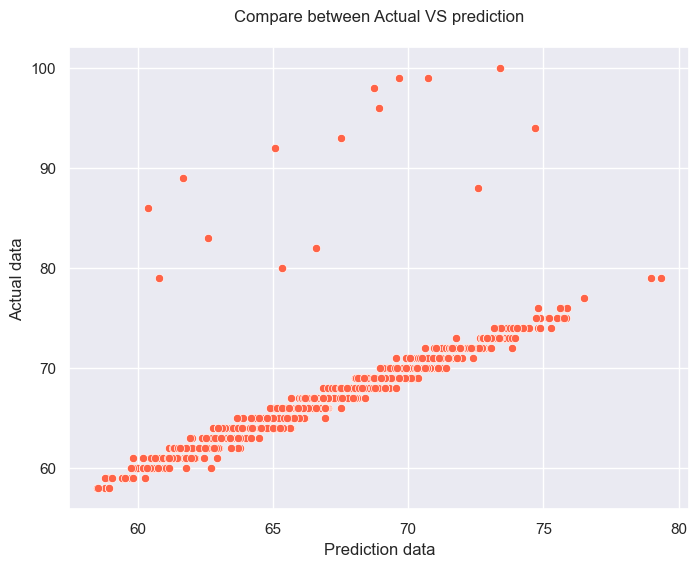

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred , y = y_test,color='tomato')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.title('Compare between Actual VS prediction\n')
plt.show()

# _Thanks_